In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import Dense
from keras.layers import Flatten
import math

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_excel('ML_predicion_harga.xlsx')
data.head()

,Daerah,tahun,tanaman,Luas panen (ha),produksi (kuintal),harga (/kg)
0,Pacitan,2020,Cabai Rawit,259.0,8252.0,18000
1,Ponorogo,2020,Cabai Rawit,467.0,20335.0,13500
2,Trenggalek,2020,Cabai Rawit,411.0,10378.0,14500
3,Tulungagung,2020,Cabai Rawit,239.0,9491.0,14666
4,Blitar,2020,Cabai Rawit,10745.0,1881377.0,14500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Daerah              465 non-null    object 
 1   tahun               465 non-null    int64  
 2   tanaman             465 non-null    object 
 3   Luas panen (ha)     465 non-null    float64
 4   produksi (kuintal)  465 non-null    float64
 5   harga (/kg)         465 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 21.9+ KB


In [4]:
data.describe()

,tahun,Luas panen (ha),produksi (kuintal),harga (/kg)
count,465.000000,465.000000,4.650000e+02,465.000000
mean,2021.000000,759.283658,8.387045e+04,23248.017204
std,0.817376,2105.628361,2.954237e+05,15639.849090
min,2020.000000,-1.000000,-1.000000e+00,4425.000000
25%,2020.000000,-1.000000,-1.000000e+00,12125.000000
50%,2021.000000,13.000000,1.121110e+02,19333.000000
75%,2022.000000,394.000000,1.676000e+04,30000.000000
max,2022.000000,17345.000000,2.785837e+06,75000.000000


In [5]:
data.isna().sum()

Daerah                0
tahun                 0
tanaman               0
Luas panen (ha)       0
produksi (kuintal)    0
harga (/kg)           0
dtype: int64

In [6]:
data.isnull().sum()

Daerah                0
tahun                 0
tanaman               0
Luas panen (ha)       0
produksi (kuintal)    0
harga (/kg)           0
dtype: int64

In [7]:
data.loc[data['Luas panen (ha)'] < 0, 'Luas panen (ha)'] = 1

In [8]:
data.loc[data['produksi (kuintal)'] < 0, 'produksi (kuintal)'] = 1

In [9]:
data.loc[data['Luas panen (ha)'] == 0]

,Daerah,tahun,tanaman,Luas panen (ha),produksi (kuintal),harga (/kg)


In [10]:
data.loc[data['produksi (kuintal)'] == 0]

,Daerah,tahun,tanaman,Luas panen (ha),produksi (kuintal),harga (/kg)


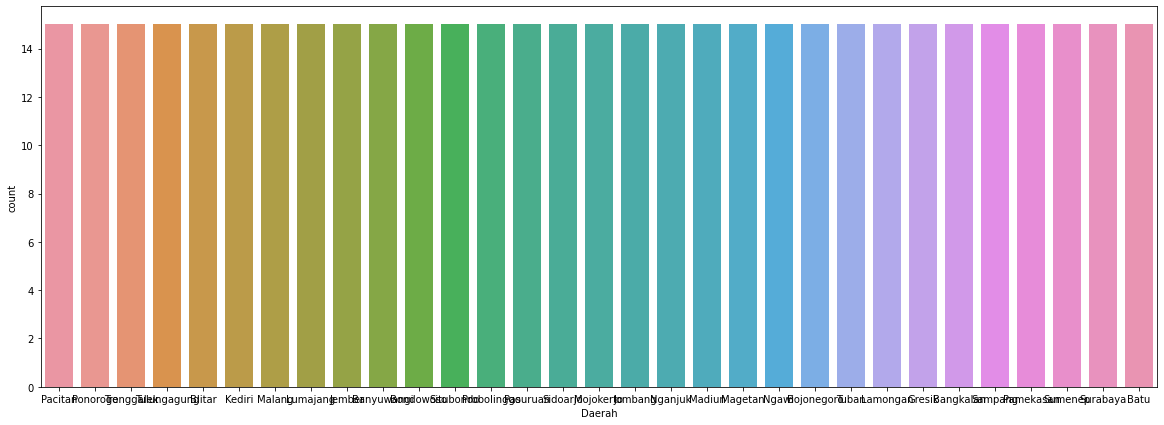

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20,7)

sns.countplot(data=data, x='Daerah')
plt.show()

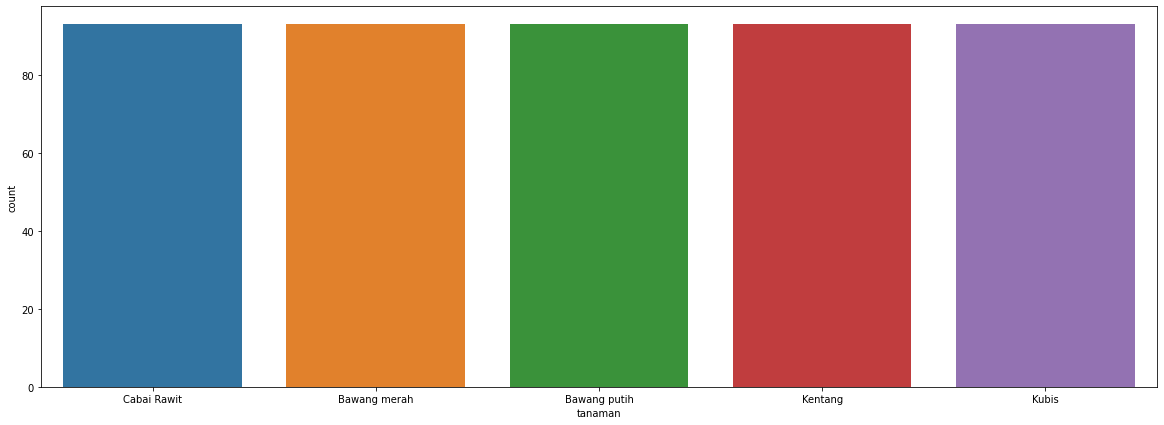

In [12]:
sns.countplot(data=data, x='tanaman')
plt.show()

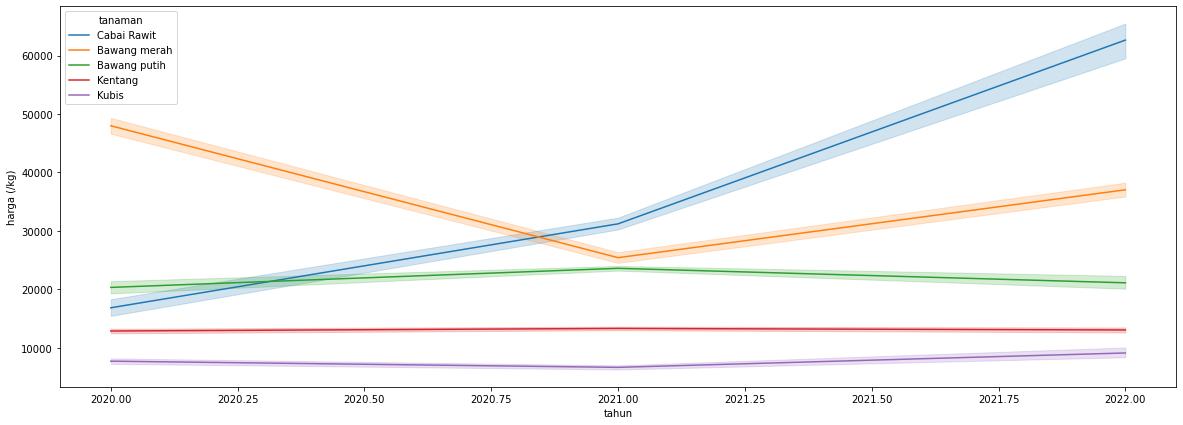

In [13]:
sns.lineplot(data=data, x='tahun', y='harga (/kg)', hue='tanaman')
plt.show()

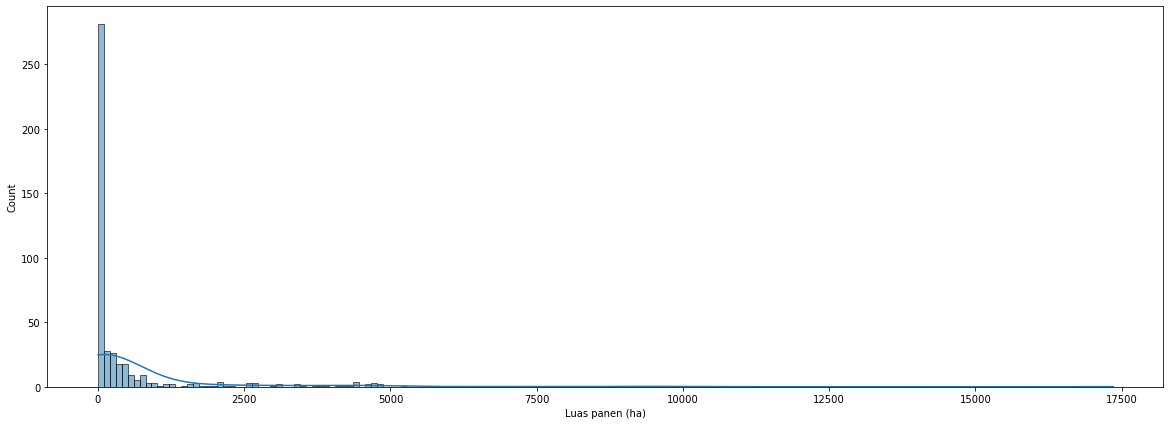

In [14]:
sns.histplot(data=data, x='Luas panen (ha)', kde=True)
plt.show()

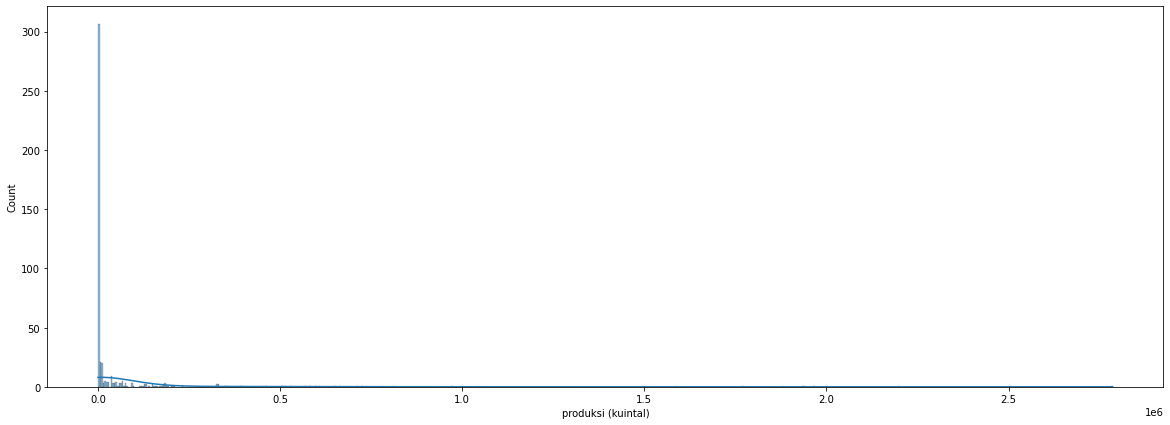

In [15]:
sns.histplot(data=data, x='produksi (kuintal)', kde=True)
plt.show()

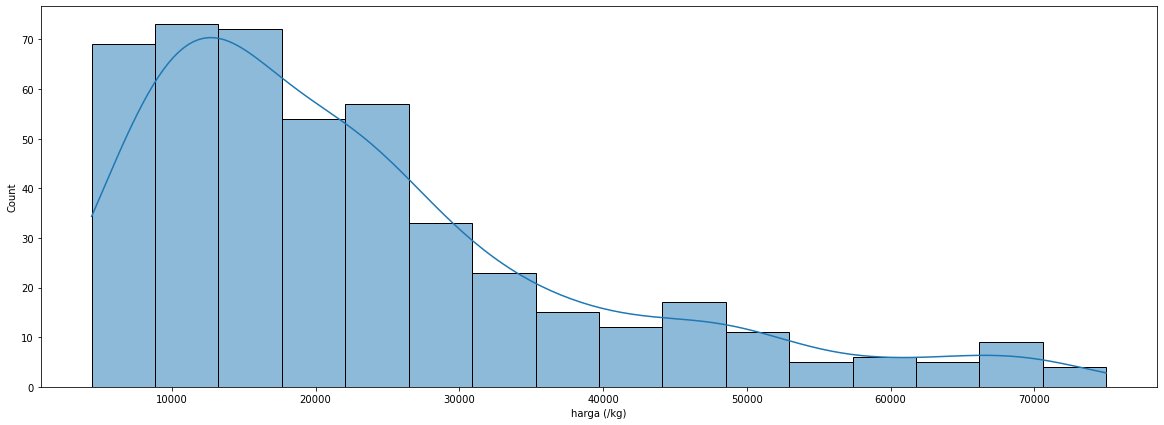

In [16]:
sns.histplot(data=data, x='harga (/kg)', kde=True)
plt.show()

In [17]:
data = pd.get_dummies(data, columns=['Daerah', 'tanaman'])
data.head()

,tahun,Luas panen (ha),produksi (kuintal),harga (/kg),Daerah_Bangkalan,Daerah_Banyuwangi,Daerah_Batu,Daerah_Blitar,Daerah_Bojonegoro,Daerah_Bondowoso,Daerah_Gresik,Daerah_Jember,Daerah_Jombang,Daerah_Kediri,Daerah_Lamongan,Daerah_Lumajang,Daerah_Madiun,Daerah_Magetan,Daerah_Malang,Daerah_Mojokerto,Daerah_Nganjuk,Daerah_Ngawi,Daerah_Pacitan,Daerah_Pamekasan,Daerah_Pasuruan,Daerah_Ponorogo,Daerah_Probolinggo,Daerah_Sampang,Daerah_Sidoarjo,Daerah_Situbondo,Daerah_Sumenep,Daerah_Surabaya,Daerah_Trenggalek,Daerah_Tuban,Daerah_Tulungagung,tanaman_Bawang merah,tanaman_Bawang putih,tanaman_Cabai Rawit,tanaman_Kentang,tanaman_Kubis
0,2020,259.0,8252.0,18000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2020,467.0,20335.0,13500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2020,411.0,10378.0,14500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,2020,239.0,9491.0,14666,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,2020,10745.0,1881377.0,14500,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [18]:
X_num = data.loc[:, ['Luas panen (ha)', 'produksi (kuintal)']].values
X_cat = data.iloc[:, 4:].values
y = data.loc[:, 'harga (/kg)'].values

In [19]:
X_transform = np.log(X_num)
y_transform = np.log(y)

In [20]:
X = np.concatenate([X_cat, X_transform], axis=1)

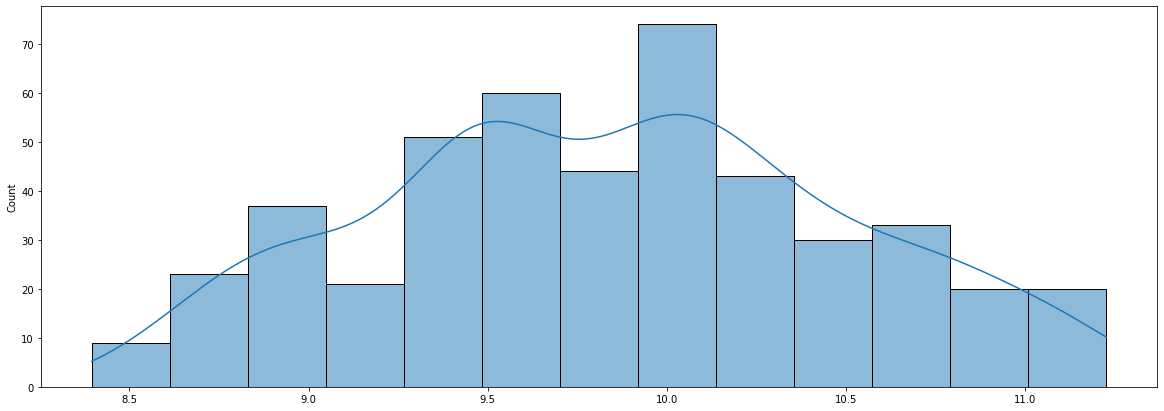

In [21]:
sns.histplot(x=y_transform, kde=True)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_transform, test_size=.2, random_state=0)

In [23]:
print('Total X_train:', len(X_train))
print('Total X_test:', len(X_test))
print('Total y_train:', len(y_train))
print('Total y_test:', len(y_test))

Total X_train: 372
Total X_test: 93
Total y_train: 372
Total y_test: 93


In [24]:
from tensorflow.keras.optimizers import SGD

model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],)),
    Dense(32),
    Dense(1)
])
model.compile(optimizer=SGD(clipnorm=.5), loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4992      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,153
Trainable params: 9,153
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
12/12 [==============================] - 1s 4ms/step - loss: 68.6568
Epoch 2/200
12/12 [==============================] - 0s 4ms/step - loss: 48.3605
Epoch 3/200
12/12 [==============================] - 0s 4ms/step - loss: 37.7918
Epoch 4/200
12/12 [==============================] - 0s 4ms/step - loss: 34.5957
Epoch 5/200
12/12 [==============================] - 0s 4ms/step - loss: 31.9660
Epoch 6/200
12/12 [==============================] - 0s 3ms/step - loss: 29.2666
Epoch 7/200
12/12 [==============================] - 0s 4ms/step - loss: 26.4060
Epoch 8/200
12/12 [==============================] - 0s 3ms/step - loss: 23.5197
Epoch 9/200
12/12 [==============================] - 0s 3ms/step - loss: 20.6120
Epoch 10/200
12/12 [==============================] - 0s 4ms/step - loss: 17.9314
Epoch 11/200
12/12 [==============================] - 0s 4ms/step - loss: 15.4073
Epoch 12/200
12/12 [==============================] - 0s 5ms/step - loss: 12.7734
Epoch 13/200
12/12 [=====

12/12 [==============================] - 0s 4ms/step - loss: 0.1356
Epoch 103/200
12/12 [==============================] - 0s 4ms/step - loss: 0.1446
Epoch 104/200
12/12 [==============================] - 0s 3ms/step - loss: 0.1355
Epoch 105/200
12/12 [==============================] - 0s 4ms/step - loss: 0.1304
Epoch 106/200
12/12 [==============================] - 0s 3ms/step - loss: 0.1333
Epoch 107/200
12/12 [==============================] - 0s 3ms/step - loss: 0.1398
Epoch 108/200
12/12 [==============================] - 0s 3ms/step - loss: 0.1315
Epoch 109/200
12/12 [==============================] - 0s 3ms/step - loss: 0.1261
Epoch 110/200
12/12 [==============================] - 0s 3ms/step - loss: 0.1361
Epoch 111/200
12/12 [==============================] - 0s 3ms/step - loss: 0.1275
Epoch 112/200
12/12 [==============================] - 0s 4ms/step - loss: 0.1231
Epoch 113/200
12/12 [==============================] - 0s 4ms/step - loss: 0.1295
Epoch 114/200
12/12 [=========

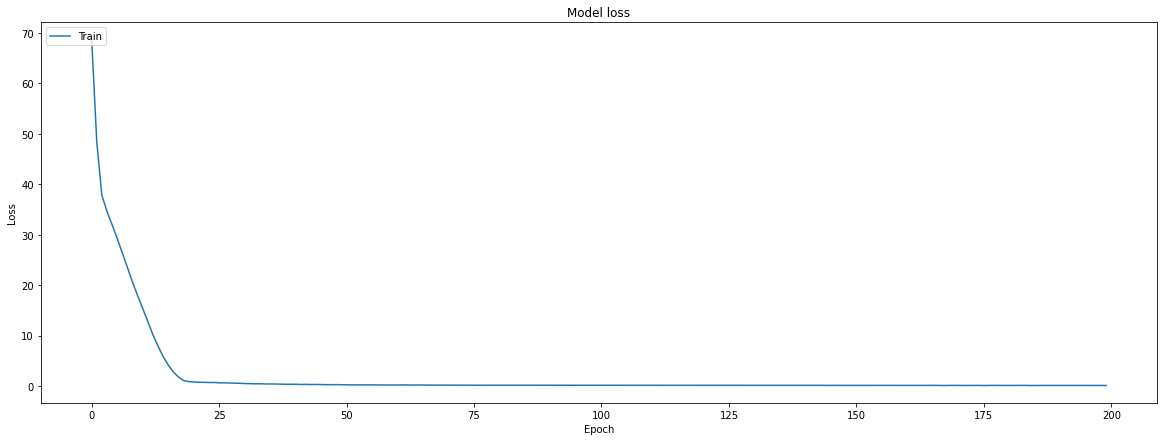

In [26]:
#show model loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error

yhat = model.predict(X_test)
error = mean_squared_error(np.exp(y_test), np.exp(yhat))
print('MSE:', error)

3/3 [==============================] - 0s 5ms/step
MSE: 108370937.73186265


In [28]:
yhat_df = pd.DataFrame({
    'y_test': np.exp(y_test),
    'yhat': np.exp(yhat[:, 0])
})

yhat_df.head(10)

,y_test,yhat
0,8333.0,8493.221680
1,13375.0,15399.567383
2,26750.0,38218.246094
3,72500.0,37800.847656
4,6900.0,7934.860840
5,9000.0,39590.625000
6,24750.0,25449.978516
7,32000.0,21443.460938
8,20000.0,21547.353516
9,23500.0,22384.324219


In [29]:
# # Daftar kategori unik dalam kolom "tanaman" dan "Daerah"
# unique_tanaman = data['tanaman'].unique()
# unique_daerah = data['Daerah'].unique()

# # Membuat kamus pemetaan kategori ke nilai numerik
# tanaman_mapping = {tanaman: i for i, tanaman in enumerate(unique_tanaman)}
# daerah_mapping = {daerah: i for i, daerah in enumerate(unique_daerah)}

# # Mengganti nilai kategori dengan nilai numerik menggunakan metode replace()
# data['tanaman'] = data['tanaman'].replace(tanaman_mapping)
# data['Daerah'] = data['Daerah'].replace(daerah_mapping)

In [30]:
# print(data['tanaman'].unique())

In [31]:
# # Visualisasi kolom 'harga (/kg)' untuk setiap jenis tanaman
# plt.figure(figsize=(16, 8))
# plt.title('Harga Tiap Tanaman')

# tanaman_mapping = {0: 'Cabai Rawit', 1: 'Bawang Merah', 2: 'Bawang Putih', 3: 'Kentang', 4: 'Kubis'}

# for tanaman_id, tanaman_label in tanaman_mapping.items():
#     filtered_data = data[data['tanaman'] == tanaman_id]
#     plt.plot(filtered_data['harga (/kg)'], marker='o', label=tanaman_label)

# plt.xlabel('Indeks Data', fontsize=18)
# plt.ylabel('Harga (/kg)', fontsize=18)
# plt.legend()
# plt.show()

In [32]:
# # Membuat dataframe baru dengan kolom yang berpengaruh
# relevant_columns = ['Daerah', 'tahun', 'tanaman', 'Luas panen (ha)', 'produksi (kuintal)', 'harga (/kg)']
# data = data[relevant_columns]

# # Mengambil kolom 'daerah' dan 'tanaman' sebagai kategori (tidak ikut scaling dan normalisasi)
# kategori_data = data[['Daerah', 'tahun', 'tanaman']]

# # Mengambil kolom-kolom numerik untuk scaling dan normalisasi
# numeric_data = data.drop(['Daerah', 'tahun', 'tanaman'], axis=1)

# # Scaling dan normalisasi
# scaler = MinMaxScaler()
# scaled_numeric_data = scaler.fit_transform(numeric_data)

# # Menggabungkan kembali kolom-kolom yang telah diubah dan yang tidak ikut diubah
# scaled_data = pd.DataFrame(scaled_numeric_data, columns=numeric_data.columns)
# scaled_dataset = pd.concat([kategori_data, scaled_data], axis=1)

# # hasil scaling dan normalisasi
# print("Data setelah scaling dan normalisasi:")
# print(scaled_dataset)


In [33]:
# # Mengonversi data ke dalam array numpy
# X = scaled_dataset[['Daerah', 'tahun', 'tanaman', 'Luas panen (ha)', 'produksi (kuintal)']].values
# y = scaled_dataset['harga (/kg)'].values

# # Menghitung jumlah baris untuk melatih model (80%)
# training_data_len = math.ceil(len(scaled_dataset) * 0.8)

# # mengitung jumlah baris untuk melatih model (20%)
# test_data_len = math.ceil(len(scaled_dataset) * 0.2)

# X_train = X[:training_data_len]
# y_train = y[:training_data_len]

# X_test = X[training_data_len:]
# y_test = y[training_data_len:]

# print("Jumlah data latih:", training_data_len)

In [34]:
# # Periksa nama kolom yang tersedia dalam DataFrame data
# print(data.columns)

In [35]:
# # Create training dataset using sliding window approach
# window_size = 60
# x_train = []
# y_train = []
# for i in range(window_size, len(X_train)):
#     x_train.append(X_train[i-window_size:i])
#     y_train.append(y[i])  # Menggunakan y sebagai variabel target

# # Convert to numpy arrays
# x_train = np.array(x_train)
# y_train = np.array(y_train)

# # Reshape y_train to have the same number of dimensions as y_test
# y_train = np.reshape(y_train, (y_train.shape[0], 1))

# # Print shape of the training dataset
# print("Shape of x_train:", x_train.shape)
# print("Shape of y_train:", y_train.shape)
# x_train[0][0]


In [36]:
# x_train = np.array(x_train)
# print(x_train.shape)

In [37]:
# # Membuat model MLP
# model = Sequential()
# model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1))

In [38]:
# # Compile dan latih model
# from sklearn import metrics
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
# history = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)


In [39]:
# #show model loss
# plt.plot(history.history['loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [40]:
# # Membuat x_test dan y_test_actual
# window_size = 60
# x_test = []
# y_test_actual = []
# for i in range(window_size, len(X_test)):
#     x_test.append(X_test[i-window_size:i, :5])  # Menggunakan hanya 5 kolom fitur
#  # Menggunakan semua kolom fitur
#     y_test_actual.append(y_test[i])

# # x_test.shape
# # y_test_actual
# # Mengonversi data menjadi array numpy
# x_test = np.array(x_test)
# x_test.shape
# # y_test_actual = np.array(y_test_actual)
# # x_test

# # # Mengubah dimensi x_test
# # x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]))  # Menggunakan 5 kolom fitur

# # # Menggunakan model untuk melakukan prediksi pada data uji
# test_predictions = model.predict(x_test)
# test_predictions[0][0][0]

# # # Mengembalikan skala asli pada data prediksi
# # test_predictions = scaler.inverse_transform(test_predictions)

# # # Mengembalikan skala asli pada data aktual
# # y_test_actual_scaled = scaler.inverse_transform(y_test_actual.reshape(-1, 1))

# # # Menghitung RMSE
# # test_rmse = np.sqrt(np.mean(np.square(test_predictions - y_test_actual_scaled)))
# # print("Testing RMSE:", test_rmse)
